We are going to calculate the call option price using **Monte Carlo Simulation**. Later we will compare the results with the Black Scholes Model. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def call_price_sim(S0,K,mu,sigma,T,nsims,steps):
    
    dt = T/steps
    
    stock_price_paths = np.zeros((nsims,steps+1))
    calls = np.zeros(nsims)
    
    stock_price_paths[:,0] = S0
    
    for i in range(nsims):
        
        for j in range(steps):
            
            epsilon = np.random.normal(0,1)
            stock_price_paths[i,j+1] = stock_price_paths[i,j] * np.exp( (mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*epsilon )
        
        calls[i] = max(K-stocks[i,steps],0)
    
    payoff = np.mean(calls)*np.exp(-mu*T)
    
    return stock_price_paths,payoff
        

## Let us now examine the above funciton. It takes the following as inputs:

1. S0 = This is the intial price of the underlying asset or stock.
2. K = This is the strike price or the asset price at the time of expiration.
3. mu =This is the expected return of the asset. 
4. sigma = This is the volatility of the asset.
5. T =Time to expiration (in years).
6. nsims = The number of times this function/simualtion will run.
7. steps = The increment or jump of the asset price(eg. day/week/month etc.)

*dt* is the actual time step. 
Now we intialize 2 numpy arrays: one to store the values of the underlying asset called **stock_price_paths**, which each row is one of many stock price evolution and each column is the price of the stock of that path\evolution on a particular day. Total number of rows = nsims.

The other array called **calls** stores the values of the call option for every stock price path. The value of the call is given by 

$$
 call = max(K-S_t,0)
$$
K is the strike price,
$S_t$ is the sotck price at the time of expiration. If $K<S_t$, it is pointless to excercise the call option.


## Now the underlying asset...

It is modeled based on the geometric brownian motion. The stock price satifises the following stochastic differential equation(SDE)-

$$
dS = S(\mu dt + \sigma dW )
$$

dS is the change in stock price.
S is the present stock price.
$\mu$ and $sigma$ are the expected return on stock and volatility(both constants), respectively.
dW is the **Wiener process**, which takes into account that the stock price changes are random and normally distributed, in line with the popular assumption. 

The above SDE can be solved by Ito's calculus which gives the following formula:

$$
S_t = S_0\exp{(\mu-\frac{\sigma^2}{2})t + \sigma W_t}
$$

In [4]:
S0 = 100
K = 105
mu = 0.08
sigma = 0.3
T = 1
nsims = 1000
steps = 252

In [7]:
stock_prices, payoff = call_price_sim(S0,K,mu,sigma,T,nsims,steps)

(1000, 253)


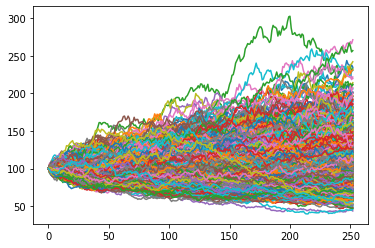

In [8]:
print(stock_prices.shape)

for i in range(stock_prices.shape[0]):
    
    plt.plot(stock_prices[i,:])

## Understanding the results
The tuple (1000,253) gives the dimensions of the stock_price_paths array, which now now store in **stock_prices**. 1000 signifies the number of times we run our simulation(rows) and 253 is the price of the stock at the end of each trading day(columns) belonging to that particular price path which we can see on the plot. It consists of multiple price paths of the underlying asset starting from $100.  

The second part of results, the variable **payoff**, stores the actual value of the call option. For every run of our simualtion we calculate the price of the call and store it in the **calls** array inside the function. After the simualtion ends we calculate the average price of the call and discount it to today's date. 

In [26]:
print(f'The value of the call, based on the monte carlo simualtion of stock prices modeled on Geometric Brownian Motion when \n 1. the initial stock price is ${S0}, \n 2. The expected return is {mu},\n 3. The volatility is {sigma},\n 4. At T={T} year,\n 5. with a Strike price of ${K} is \n ${payoff:.2f}')

The value of the call, based on the monte carlo simualtion of stock prices modeled on Geometric Brownian Motion when 
 1. the initial stock price is $100, 
 2. The expected return is 0.08,
 3. The volatility is 0.3,
 4. At T=1 year,
 5. with a Strike price of $105 is 
 $10.11


In [21]:
def black_scholes_call(S, K, mu, sigma, T):
    d1 = (np.log(S / K) + (mu + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    bs_call_price = S * norm.cdf(d1) - K * np.exp(-mu * T) * norm.cdf(d2)
    return bs_call_price

In [22]:
bs_call = black_scholes_call(S0,K,mu,sigma,T)

In [24]:
print(f'The value of the call, based on the Black-Scholes formula when \n 1. the initial stock price is ${S0}, \n 2. The expected return is {mu},\n 3. The volatility is {sigma},\n 4. At T={T} year,\n 5. with a Strike price of ${K} is \n ${bs_call:.2f}')

The value of the call, based on the Black-Scholes formula when 
 1. the initial stock price is $100, 
 2. The expected return is 0.08,
 3. The volatility is 0.3,
 4. At T=1 year,
 5. with a Strike price of $105 is 
 $13.34
